# Importing Libraries

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [2]:
df = pd.read_csv("customer_churn_large_dataset.csv")

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


# EDA and Feature Engineering

In [217]:
df.head()

,CustomerID,Name,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,GENDER
0,1,Customer_1,63,Los Angeles,17,73.36,236,0,1
1,2,Customer_2,62,New York,1,48.76,172,0,0
2,3,Customer_3,24,Los Angeles,5,85.47,460,0,0
3,4,Customer_4,36,Miami,3,97.94,297,1,0
4,5,Customer_5,46,Miami,19,58.14,266,0,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.size

900000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [12]:
df['Gender'].nunique()

2

# Data Exploration

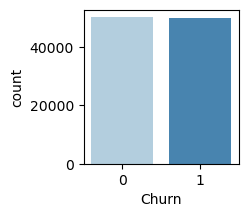

In [13]:
plt.figure(figsize=(2,2))
ax = sns.countplot(x=df['Churn'], palette = "Blues", linewidth = 1)
plt.show()

In [14]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Checking Outliers

<Axes: >

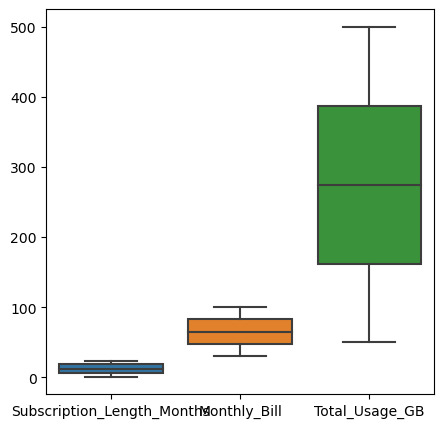

In [15]:
plt.figure(figsize =(5,5))
sns.boxplot(df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])

In [16]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [17]:
numeric_features = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
df_num = df[numeric_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
IQR

Subscription_Length_Months     13.0
Monthly_Bill                   35.1
Total_Usage_GB                226.0
dtype: float64

In [18]:
((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q1 + 1.5 * IQR))).any()

Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
dtype: bool

# Feature Engineering

In [219]:
from scipy.stats import zscore
df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']].apply(zscore)

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.651115,0.410606,-0.294289
1,-1.658879,-0.805374,-0.784852
2,-1.081380,1.009204,1.422681
3,-1.370129,1.625597,0.173279
4,0.939864,-0.341720,-0.064338
...,...,...,...
99995,1.517363,-0.490504,-0.370939
99996,0.939864,-0.168220,0.587191
99997,0.651115,1.535140,-0.179313
99998,1.084239,-0.781153,1.223390


# Label Encoding

In [19]:
df['GENDER'] = np.where((df['Gender']=='Male'), 1, 0)

In [20]:
df.drop(columns = ['Gender'], inplace = True)

In [21]:
df.head()

,CustomerID,Name,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,GENDER
0,1,Customer_1,63,Los Angeles,17,73.36,236,0,1
1,2,Customer_2,62,New York,1,48.76,172,0,0
2,3,Customer_3,24,Los Angeles,5,85.47,460,0,0
3,4,Customer_4,36,Miami,3,97.94,297,1,0
4,5,Customer_5,46,Miami,19,58.14,266,0,0


In [22]:
##Feature scaling: min-max scaling
from sklearn.preprocessing import MinMaxScaler
#feature_s = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
#df_feature_s = pd.DataFrame(df, columns = feature_s)

#s = MinMaxScaler()
#rescaled_feature = s.fit_transform(df_feature_s)

#df_rescaled_feature = pd.DataFrame(rescaled_feature,columns = feature_s,index = df_remaining.index)

#df = pd.concat([df_feature_s,rescaled_feature],axis = 1)

C:\Users\tabas\AppData\Local\Temp\ipykernel_11664\2808033063.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar',figsize = (15,5))


<Axes: >

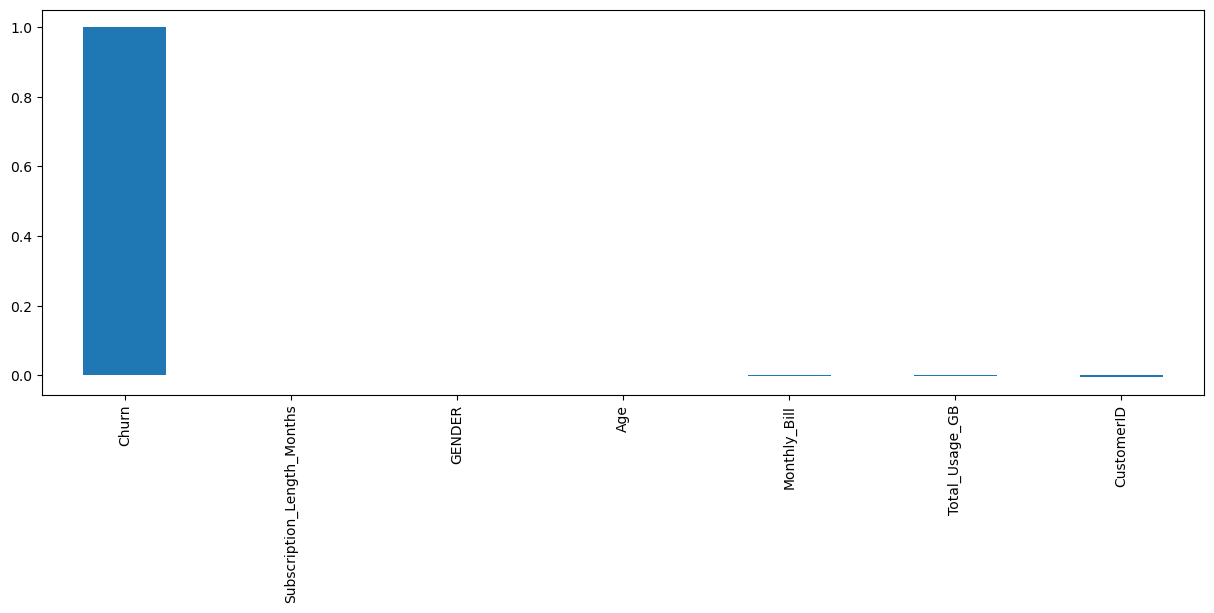

In [23]:
#Correlation Analysis
plt.figure(figsize = (12,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar',figsize = (15,5))

# Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split
y = df['Churn'].values
x = df['Monthly_Bill'].values

In [62]:
x = np.array(df['Monthly_Bill']).reshape(-1,1)

In [63]:
y = np.array(df['Churn']).reshape(-1,1)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.80, random_state = 0)

In [65]:
x.shape

(100000, 1)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [67]:
log =  LogisticRegression()

In [68]:
log.fit(x_train, y_train)

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [79]:
y_pred= log.predict(x_test)

In [80]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10091,     0],
       [ 9909,     0]], dtype=int64)

In [81]:
#Accuracy_score
metrics.accuracy_score(y_test,y_pred)

0.50455

In [153]:
#building multiple logistic reg
x1 = df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]
y1 = df[['Churn']]

In [154]:
x_train, x_test, y_train, y_test = train_test_split (x1,y1,train_size = 0.80, random_state = 0)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [156]:
log1 =  LogisticRegression()

In [157]:
log1.fit(x_train, y_train)

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [169]:
y1_Pred = log1.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [172]:
#confusion_matrix
cf_matrix1 = confusion_matrix(y_test,y1_Pred)
print(cf_matrix1)

[[7223 2868]
 [7118 2791]]


In [173]:
fn,fp,tn,tp = cf_matrix1.ravel()
print(fn,fp,tn,tp)

7223 2868 7118 2791


<Axes: >

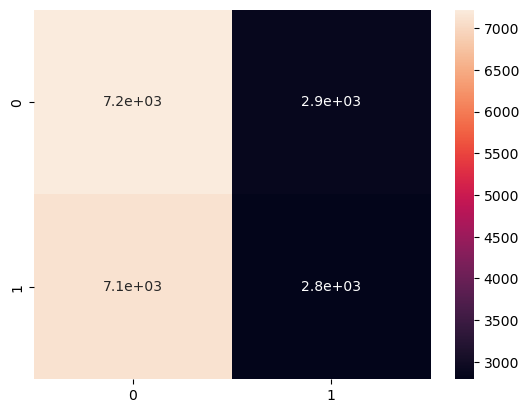

In [174]:
import seaborn as sns
sns.heatmap(cf_matrix1, annot=True)

# accuracy_score

In [176]:
metrics.accuracy_score(y_test,y1_Pred)

0.5007

# RandomForest

In [142]:
x2 = df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]
y2 = df[['Churn']]

In [143]:
x_train, x_test, y_train, y_test = train_test_split (x2,y2, train_size = 80, random_state = 0)


In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
model = RandomForestClassifier(n_estimators=50,max_depth=10) 

In [146]:
model.fit(x_train, y_train) 

C:\Users\tabas\AppData\Local\Temp\ipykernel_11664\2716376570.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50)

In [147]:
y2_pred = model.predict(x_train)

In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [149]:
cf_matrix = confusion_matrix(y_train,y2_pred)
print(cf_matrix)

[[42  0]
 [ 0 38]]


In [150]:
fn,fp,tn,tp = cf_matrix.ravel()
print(fn,fp,tn,tp)

42 0 0 38


<Axes: >

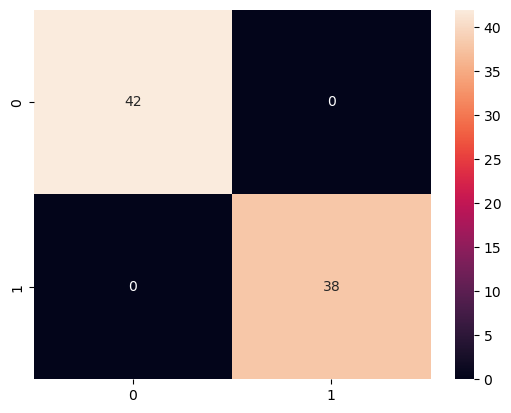

In [151]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [152]:
print("Accuracy:",accuracy_score(y_train, y2_pred))

Accuracy: 1.0


In [182]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
                                              0.0/70.9 MB ? eta -:--:--
                                              0.0/70.9 MB 1.3 MB/s eta 0:00:56
                                             0.1/70.9 MB 656.4 kB/s eta 0:01:48
                                             0.1/70.9 MB 751.6 kB/s eta 0:01:35
                                             0.2/70.9 MB 817.0 kB/s eta 0:01:27
                                             0.2/70.9 MB 831.5 kB/s eta 0:01:26
                                              0.3/70.9 MB 1.0 MB/s eta 0:01:11
                                              0.4/70.9 MB 1.1 MB/s eta 0:01:05
                                              0.5/70.9 MB 1.2 MB/s eta 0:01:01
                                              0.5/70.9 MB 1.2 MB/s eta 0:00:59
                                              0.5/70.9 MB 1.2 MB/s eta 0:01:00
                                              0.7/

In [183]:
#xgboost classifier
from xgboost import XGBClassifier
xg = XGBClassifier(objective = 'binary:logistic')
xg.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [186]:
print("Testing accuracy is : ", xg.score(x_test,y_test))

Testing accuracy is :  0.49805


# Hyperparameter Tuning

In [193]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
from sklearn.model_selection import RandomizedSearchCV

In [202]:
param_grid = {
        'max_depth':[2,3,4,5],
         'n_estimator':[20,40]}

In [204]:
grid =  RandomizedSearchCV(XGBClassifier(objective = 'binary:logistic'), param_grid, verbose = 2)

In [205]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[19:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[CV] END ........................max_depth=2, n_estimator=20; total time=   0.7s
[19:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[CV] END ........................max_depth=2, n_estimator=20; total time=   0.5s
[19:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[CV] END ........................max_depth=2, n_estimator=20; total time=   0.4s
[19:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d

[CV] END ........................max_depth=4, n_estimator=40; total time=   0.8s
[19:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[CV] END ........................max_depth=5, n_estimator=20; total time=   1.3s
[19:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[CV] END ........................max_depth=5, n_estimator=20; total time=   1.4s
[19:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[CV] END ........................max_depth=5, n_estimator=20; total time=   1.1s
[19:31:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autos

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'n_estimator': [20, 40]},
                   verbose=2)

In [207]:
grid.best_params_

{'n_estimator': 20, 'max_depth': 2}

In [210]:
xg = XGBClassifier(n_estimator= 20, max_depth= 2)
xg.fit(x_train,y_train)

[19:34:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=20, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [211]:
print("Testing accuracy is : ", xg.score(x_test,y_test))

Testing accuracy is :  0.49805


# Save Model

In [213]:
import pickle 
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file ,'wb'))

In [214]:
load_model = pickle.load(open(file ,'rb'))

In [215]:
y_prep =  load_model.predict(x_test)

In [216]:
y_prep

array([1, 0, 0, ..., 0, 0, 1])